# Part 3: Hist current work and plans

## TODO: Talk a bit about plans, maybe a slide per planned feature for 3-4 features?

**Probable features:**

- Stacked Histograms
- Interpolator
- [plotgrid feature](https://coffeateam.github.io/coffea/api/coffea.hist.plotgrid.html#plotgrid) from Coffea
- Fill from Awkward Arrays
- Minor Features
    - Improved Reprs
    - Integrationn with fitters

## Stacked Histograms

- A function that plots several histograms in a stack
- I hold multiple histograms in which the axes are required to match

Here, we plot muptiple Histograms using a stack. We can notice how all of them have the same dimension and axes types.

In [1]:
from hist import Hist, Stack, axis
import numpy as np

[[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc195d3eb80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc195d048e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fc195d27610>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]]

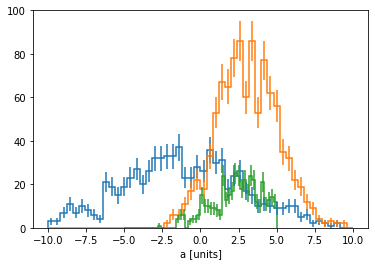

In [2]:
h1 = Hist(
    axis.Regular(
        50, -5, 5, name="A", label="a [units]", underflow=False, overflow=False
    )
).fill(2 * np.random.normal(size=500) + 3 * np.ones((500,)))

h2 = Hist(
    axis.Regular(
        50, -10, 10, name="B", label="b [units]", underflow=False, overflow=False
    )
).fill(2 * np.random.normal(size=1000) + 3 * np.ones((1000,)))

h3 = Hist(
    axis.Regular(
        50, -10, 10, name="C", label="c [units]", underflow=False, overflow=False
    )
).fill(4 * np.random.normal(size=800) - np.ones((800,)))

Stack(h1, h2, h3).plot()

If we introduce a histogram with a different dimensions, it would throw an erorr.

In [3]:
h4 = (
    Hist.new
    .Int(-10, 10, name="D", label="d [units]", underflow=False, overflow=False)
    .Reg(10, 0 ,10, name="E", label="e [units]", underflow=False, overflow=False)
    .Int64()
)

h4.fill(D = np.random.normal(5, 1, 10), E = np.random.normal(5, 1, 10))

Stack(h1, h2, h4).plot()

ValueError: Histograms' dimensions don't match

Similarly, if we introduce a histogram with a different axes types, it would again throw an erorr.

In [4]:
h5 = Hist(
    axis.Integer(-10, 10, name="F", label="f [units]", underflow=False, overflow=False)
).fill(2 * np.random.normal(size=1000) + 3 * np.ones((1000,)))

Stack(h1, h2, h5).plot()

ValueError: Histograms' axes types don't match

## Interpolator

- A class that would be able to interpolate histograms
- It would take a histogram and would return the interpolated value at that point
- Various interfaces for different kinds of interpolation such as `hist.interp.Linear(h)` and `hist.interp.Cubic(h)`
- Ability to make your own too
- Would help in better estimation and interpretation of data

## plotgrid feature from Coffea

- Would create a grid of plots
- Arbitrary rebins can be introducedFill from Awkward Arrays later

## Fill from Awkward Arrays

- Awkward Arrays would be taken in `.fill()` intelligently
- `ak.flatten`, `ak.fields` and `ak.unzip` can be used to address different situations depending upon the data

## Minor Features

- Improved Reprs
    - Reprs with better details and information
    - COnifgurable options to give a better output
    
- Integrationn with fitters
    - Implementation to ensure proper interaction with fitters
    - Can be done for various fitters such as ZFit, PyHF and GooFit
